# KDD FINAL PROJECT

    CHRAN SURESH - 10450732     SHREYA VHADADI - 10453495    PRITIHIV DEV - 10453922

## Online Shopper's Intention
The main idea is to find the customers intention of whether he/she would buy the particular product given the features.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [36]:
data = pd.read_csv("online_shoppers_intention.csv")

In [37]:
data.Revenue.unique().tolist()

[False, True]

#### The dataset is a binary class with imbalanced data with Revenue- True with lesser sample which depicts the customers who have bought products from the ecommerce website

([<matplotlib.patches.Wedge at 0x1a1706b850>,
 [Text(0.9725550024353201, 0.5139423773518141, 'True'),
  Text(-0.9725549783759403, -0.5139424228803988, 'False')])

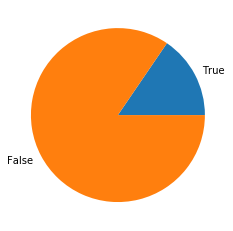

In [57]:
plt.pie([len(data[data["Revenue"]==True]),len(data[data["Revenue"]==False])],labels=["True","False"])

#### The dataset is found to have 14 values in each column and found out that all the 14 values like in the same column, so we decided to remove the corresponding 14 records

In [4]:
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### The dataset is divided for features(x) and labels(y) and the values are label encoder(distinct string values changed to numeric integers)

In [7]:
x = data.iloc[:,0:17]
y = data.iloc[:,17:]

In [8]:
le = LabelEncoder()

In [9]:
x['Month'] = le.fit_transform(x['Month'])
x['VisitorType'] = le.fit_transform(x['VisitorType'])
x['Weekend'] = le.fit_transform(x['Weekend'])

In [10]:
y['Revenue'] = le.fit_transform(y['Revenue'])

#### The correlation matrix is drawn even though the correlation was high for two of the values there literal meaning had been different wherein we decided not to remove the data

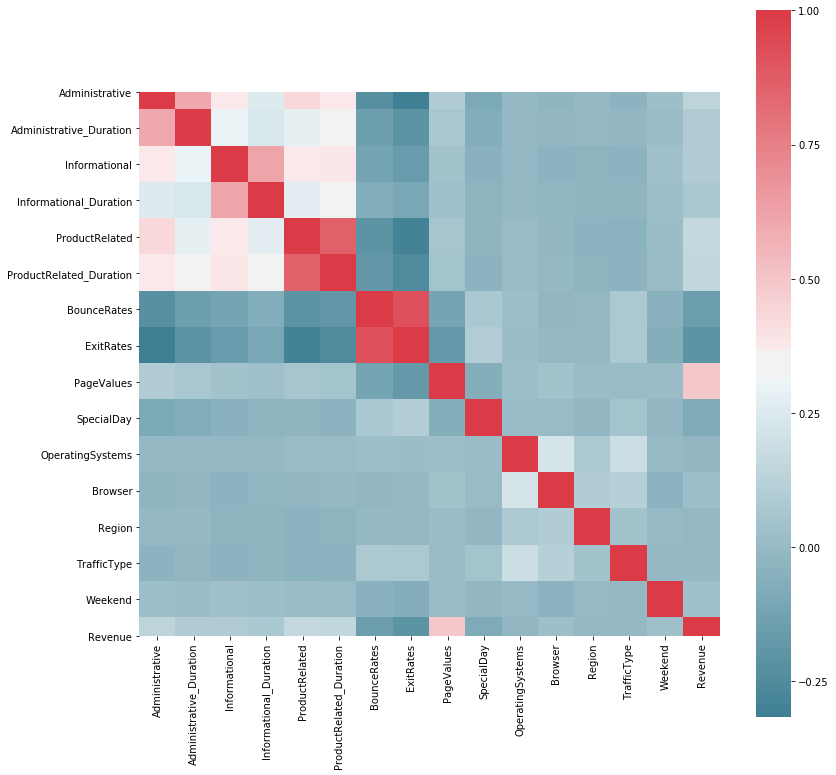

In [13]:
f,ax = plt.subplots(figsize=(13,13))
corr = data.corr()
fig = sns.heatmap(corr,mask = np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),square = True,ax = ax)
fig.figure.savefig("corr.png")

#### The train and test data is split to with a 80-20 ratio

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state =42 )

#### The baseline model is defined with random prediction 

In [15]:
random_prediction = np.random.randint(2, size = len(y_test))

In [16]:
accuracy = accuracy_score(random_prediction, y_test)
print("The Accuracy for Random Prediction: ",accuracy)

The Accuracy for Random Prediction:  0.5040584415584416


#### The test data is compared with all true

In [17]:
ones = np.ones(len(y_test))

In [18]:
accuracy = accuracy_score(ones, y_test)
print("The Accuracy for all Ones Prediction: ",accuracy)

The Accuracy for all Ones Prediction:  0.1444805194805195


#### The test data is compared with all false

In [19]:
zeros = np.zeros(len(y_test))

In [20]:
accuracy = accuracy_score(zeros, y_test)
print("The Accuracy for all Zeros Prediction: ",accuracy)

The Accuracy for all Zeros Prediction:  0.8555194805194806


# KNN

In [21]:
prec = []
values = []
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    pred_knn = neigh.predict(x_test)
    print("\nThe number of neighbors :",i)
    print(classification_report(pred_knn,y_test))
    precision_knn,_,_,_ = precision_recall_fscore_support(pred_knn,y_test)
    prec.append(precision_knn[1])
    values.append(i)


The number of neighbors : 1
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2146
           1       0.37      0.41      0.39       318

    accuracy                           0.83      2464
   macro avg       0.64      0.65      0.64      2464
weighted avg       0.84      0.83      0.84      2464


The number of neighbors : 2
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2341
           1       0.22      0.63      0.32       123

    accuracy                           0.87      2464
   macro avg       0.60      0.75      0.62      2464
weighted avg       0.94      0.87      0.90      2464


The number of neighbors : 3
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2236
           1       0.37      0.58      0.46       228

    accuracy                           0.87      2464
   macro avg       0.66      0.74      0.

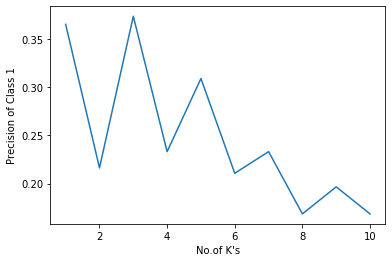

In [22]:
fig = plt.figure()
plt.plot(values,prec)
plt.xlabel("No.of K's")
plt.ylabel("Precision of Class 1")
fig.savefig('k values vs precision.png')

In [23]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
pred_knn = neigh.predict(x_test)
print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2236
           1       0.37      0.58      0.46       228

    accuracy                           0.87      2464
   macro avg       0.66      0.74      0.69      2464
weighted avg       0.90      0.87      0.88      2464



# Decision Tree

In [24]:
trees = DecisionTreeClassifier()
trees.fit(x_train, y_train)
pred_dt = trees.predict(x_test)
print(classification_report(pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2086
           1       0.51      0.48      0.50       378

    accuracy                           0.85      2464
   macro avg       0.71      0.70      0.71      2464
weighted avg       0.85      0.85      0.85      2464



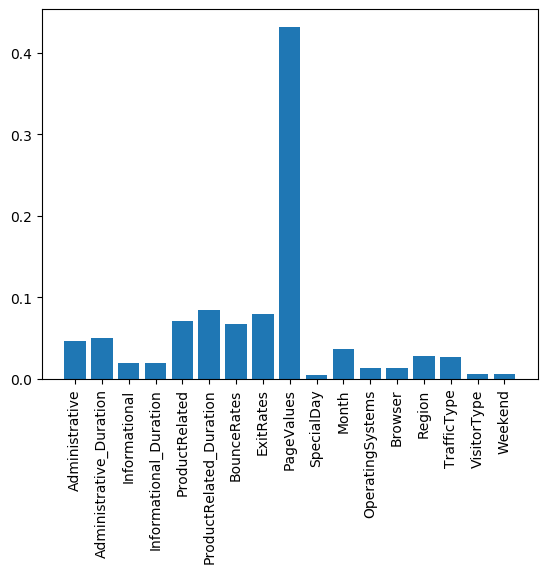

In [32]:
a = x.columns
plt.bar(a,trees.feature_importances_, align='center')
plt.xticks(rotation=90)
plt.show()

# Random Forest

In [17]:
prec = []
values = []
for i in range(100,1100,100):
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(x_train,y_train)
    pred_rf = rf.predict(x_test)
    precision_rf,_,_,_ = precision_recall_fscore_support(pred_rf,y_test)
    prec.append(precision_rf[1])
    values.append(i)
    print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2182
           1       0.55      0.70      0.61       282

    accuracy                           0.90      2464
   macro avg       0.75      0.81      0.78      2464
weighted avg       0.91      0.90      0.91      2464

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2183
           1       0.55      0.70      0.62       281

    accuracy                           0.90      2464
   macro avg       0.76      0.81      0.78      2464
weighted avg       0.91      0.90      0.91      2464

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2180
           1       0.57      0.71      0.63       284

    accuracy                           0.90      2464
   macro avg       0.76      0.82      0.79      2464
weighted avg       0.92      0.90      0.91      2464

              preci

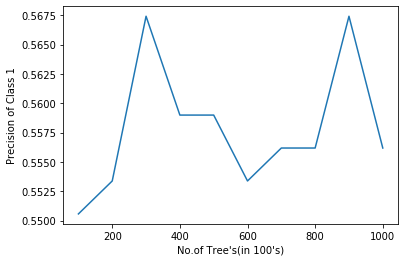

In [18]:
fig = plt.figure()
plt.plot(values,prec)
plt.xlabel("No.of Tree's(in 100's)")
plt.ylabel("Precision of Class 1")
fig.savefig('No. of trees vs precision.png')

In [19]:
rf = RandomForestClassifier(n_estimators = 300)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2172
           1       0.58      0.70      0.63       292

    accuracy                           0.90      2464
   macro avg       0.77      0.82      0.79      2464
weighted avg       0.91      0.90      0.91      2464



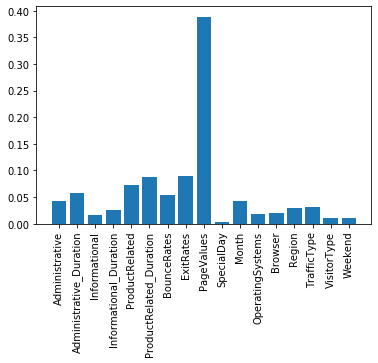

In [23]:
a = x.columns
plt.bar(a,rf.feature_importances_, align='center')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(trees, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

# ANN

In [126]:
ann = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(8))
ann.fit(x_train, y_train)
nn_prediction = ann.predict(x_test)
print(classification_report(nn_prediction,y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2239
           1       0.41      0.65      0.51       225

    accuracy                           0.88      2464
   macro avg       0.69      0.78      0.72      2464
weighted avg       0.91      0.88      0.89      2464



# K MEANS

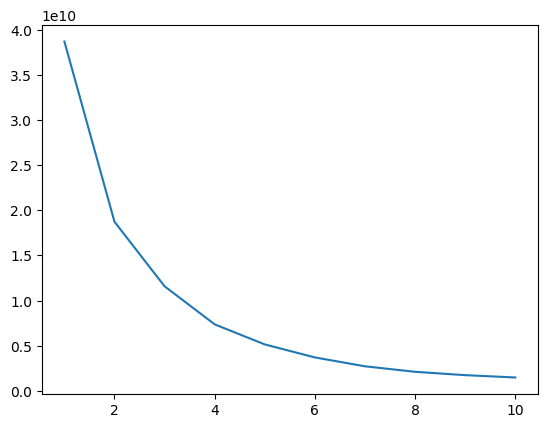

In [91]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10 , random_state = 0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.show()

In [92]:
kmeans = KMeans(n_clusters = 4,init = 'k-means++',max_iter = 300, n_init = 10, random_state =0)
y_kmeans = kmeans.fit_predict(x)

# SVM

In [145]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [152]:
svm = LinearSVC()
svm.fit(x_train, y_train)
pred_svm = svm.predict(x_test)
print(classification_report(pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93      2343
           1       0.25      0.74      0.38       121

    accuracy                           0.88      2464
   macro avg       0.62      0.82      0.66      2464
weighted avg       0.95      0.88      0.91      2464



# Logistic Regression

In [153]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
predicts = clf.predict(x_test)
print(classification_report(predicts,y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2280
           1       0.34      0.66      0.45       184

    accuracy                           0.88      2464
   macro avg       0.66      0.78      0.69      2464
weighted avg       0.92      0.88      0.90      2464



# Random Final

#### The final model is calculated with the most important features that shows a similar precision to the all feature model.

In [188]:
x_trains = x_train.iloc[:,[7,8]]

In [189]:
x_tests = x_test.iloc[:,[7,8]]

In [190]:
rf = RandomForestClassifier(n_estimators = 300)
rf.fit(x_trains,y_train)
pred_rf = rf.predict(x_tests)
print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2101
           1       0.58      0.57      0.57       363

    accuracy                           0.88      2464
   macro avg       0.75      0.75      0.75      2464
weighted avg       0.87      0.88      0.87      2464



# Naive Bayes

In [192]:
from sklearn.naive_bayes import GaussianNB

In [193]:
gb = GaussianNB()
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)
print(classification_report(pred_gb,y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2092
           1       0.50      0.48      0.49       372

    accuracy                           0.85      2464
   macro avg       0.70      0.70      0.70      2464
weighted avg       0.85      0.85      0.85      2464

